In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
b_times_df = pd.read_csv('Bdata/timestamps.csv')
g_times_df = pd.read_csv('Gdata/Grant_timestamps.csv')

In [6]:
b_times_df['endTime'] = pd.to_datetime(b_times_df['endTime'])
b_times_df = b_times_df.sort_values(by='endTime')

g_times_df['ts'] = pd.to_datetime(g_times_df['ts'])
g_times_df = g_times_df.sort_values(by='ts')

Stackoverflow had a really clean and nice way of getting the start date for a period using the built-in to_period method and .apply.
https://stackoverflow.com/questions/42586916/how-to-use-python-to-convert-date-to-weekly-level-and-use-sunday-as-week-start-d

We'll use these to group our data correctly for our histograms

In [7]:
# Aggregating data by week, month, hour of the day, and day of the week
# For week and month, we use the start of the week/month as the label

# Week
b_times_df['Week'] = b_times_df['endTime'].dt.to_period('W').apply(lambda r: r.start_time)
g_times_df['Week'] = g_times_df['ts'].dt.to_period('W').apply(lambda r: r.start_time)

# Month
b_times_df['Month'] = b_times_df['endTime'].dt.to_period('M').apply(lambda r: r.start_time)
g_times_df['Month'] = g_times_df['ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Hour of the day
b_times_df['Hour'] = b_times_df['endTime'].dt.hour
g_times_df['Hour'] = g_times_df['ts'].dt.hour

# Day of the week (0=Monday, 6=Sunday)
b_times_df['DayOfWeek'] = b_times_df['endTime'].dt.dayofweek
g_times_df['DayOfWeek'] = g_times_df['ts'].dt.dayofweek

# Aggregating counts
weekly_counts_1 = b_times_df.groupby('Week').size()
weekly_counts_2 = g_times_df.groupby('Week').size()

monthly_counts_1 = b_times_df.groupby('Month').size()
monthly_counts_2 = g_times_df.groupby('Month').size()

hourly_counts_1 = b_times_df.groupby('Hour').size()
hourly_counts_2 = g_times_df.groupby('Hour').size()

day_of_week_counts_1 = b_times_df.groupby('DayOfWeek').size()
day_of_week_counts_2 = g_times_df.groupby('DayOfWeek').size()


/Users/grantdidway/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/Users/grantdidway/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


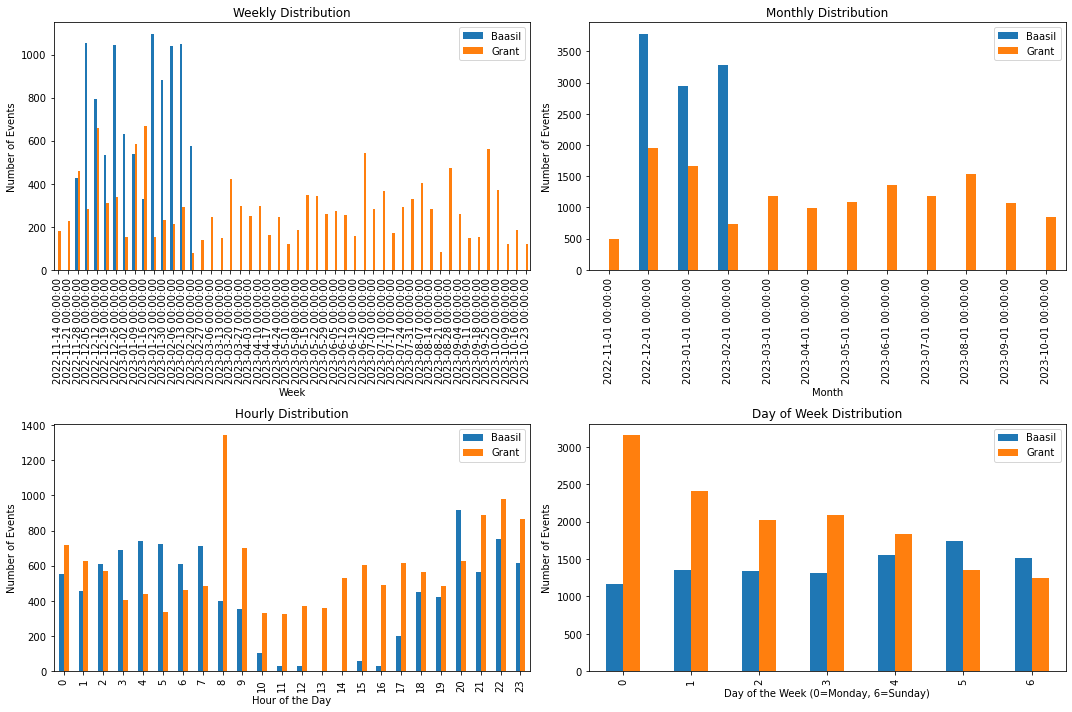

In [9]:

# We'll make it pretty by arranging all four together using plt.subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Weekly Distribution
weekly_counts_df = pd.DataFrame({'Baasil': weekly_counts_1, 'Grant': weekly_counts_2}).fillna(0)
weekly_counts_df.plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Weekly Distribution')
axs[0, 0].set_xlabel('Week')
axs[0, 0].set_ylabel('Number of Events')

# Monthly Distribution
monthly_counts_df = pd.DataFrame({'Baasil': monthly_counts_1, 'Grant': monthly_counts_2}).fillna(0)
monthly_counts_df.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Monthly Distribution')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Number of Events')

# Hourly Distribution
hourly_counts_df = pd.DataFrame({'Baasil': hourly_counts_1, 'Grant': hourly_counts_2}).fillna(0)
hourly_counts_df.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Hourly Distribution')
axs[1, 0].set_xlabel('Hour of the Day')
axs[1, 0].set_ylabel('Number of Events')

# Day of Week Distribution
day_of_week_counts_df = pd.DataFrame({'Baasil': day_of_week_counts_1, 'Grant': day_of_week_counts_2}).fillna(0)
day_of_week_counts_df.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Day of Week Distribution')
axs[1, 1].set_xlabel('Day of the Week (0=Monday, 6=Sunday)')
axs[1, 1].set_ylabel('Number of Events')

plt.tight_layout()
plt.show()


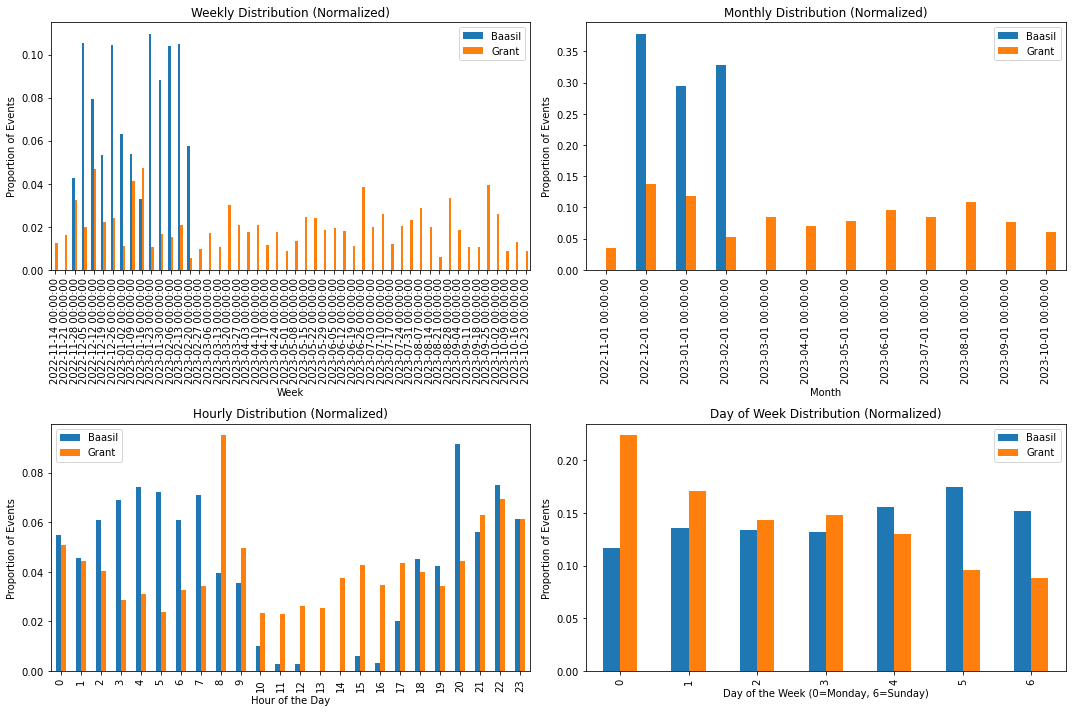

In [10]:
# Normalizing the data for comparison
# The normalization will be done by dividing each count by the total counts in that dataset
# This gives a proportion of events per time period, making it easier to compare datasets of different sizes

# Total counts for each dataset
total_counts_1 = len(b_times_df)
total_counts_2 = len(g_times_df)

# Normalized counts
weekly_counts_normalized_1 = weekly_counts_1 / total_counts_1
weekly_counts_normalized_2 = weekly_counts_2 / total_counts_2

monthly_counts_normalized_1 = monthly_counts_1 / total_counts_1
monthly_counts_normalized_2 = monthly_counts_2 / total_counts_2

hourly_counts_normalized_1 = hourly_counts_1 / total_counts_1
hourly_counts_normalized_2 = hourly_counts_2 / total_counts_2

day_of_week_counts_normalized_1 = day_of_week_counts_1 / total_counts_1
day_of_week_counts_normalized_2 = day_of_week_counts_2 / total_counts_2

# A lot of copying and pasting here
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Weekly Distribution - Normalized
weekly_counts_normalized_df = pd.DataFrame({'Baasil': weekly_counts_normalized_1, 'Grant': weekly_counts_normalized_2}).fillna(0)
weekly_counts_normalized_df.plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Weekly Distribution (Normalized)')
axs[0, 0].set_xlabel('Week')
axs[0, 0].set_ylabel('Proportion of Events')

# Monthly Distribution - Normalized
monthly_counts_normalized_df = pd.DataFrame({'Baasil': monthly_counts_normalized_1, 'Grant': monthly_counts_normalized_2}).fillna(0)
monthly_counts_normalized_df.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Monthly Distribution (Normalized)')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Proportion of Events')

# Hourly Distribution - Normalized
hourly_counts_normalized_df = pd.DataFrame({'Baasil': hourly_counts_normalized_1, 'Grant': hourly_counts_normalized_2}).fillna(0)
hourly_counts_normalized_df.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Hourly Distribution (Normalized)')
axs[1, 0].set_xlabel('Hour of the Day')
axs[1, 0].set_ylabel('Proportion of Events')

# Day of Week Distribution - Normalized
day_of_week_counts_normalized_df = pd.DataFrame({'Baasil': day_of_week_counts_normalized_1, 'Grant': day_of_week_counts_normalized_2}).fillna(0)
day_of_week_counts_normalized_df.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Day of Week Distribution (Normalized)')
axs[1, 1].set_xlabel('Day of the Week (0=Monday, 6=Sunday)')
axs[1, 1].set_ylabel('Proportion of Events')

plt.tight_layout()
plt.show()


## Reflections
#### What do you notice by looking at both partners' data together that you didn't notice looking at the on their own?

Grant's data shows a more even distribution across weekly and monthly intervals, indicating diverse engagement with timestamps. In contrast, Baasil's dataset exhibits a clustered pattern, with a concentration at the beginning of these intervals, resulting in a less uniform spread. Despite these differences, both follow similar day-of-the-week trends, suggesting a shared rhythm in behaviors.